In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
cntry_dat = pd.read_csv('Country-data.csv')
cntry_dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Checking the shape of the dataset
cntry_dat.shape

(167, 10)

In [4]:
cntry_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
cntry_dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We can see that there are no null data in the dataframe. There are total 167 rows and 11 columns and we have 167 non-null rows for all columns. Also all columns are numerical except country, we will drop country for PCA data.

In [6]:
#Converting income and gdpp to float.

cntry_dat['income'] = cntry_dat['income'].astype(float)
cntry_dat['gdpp'] = cntry_dat['gdpp'].astype(float)

In [7]:
cntry_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


In [8]:
cntry_dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The data is evenly distributed. We are standardizing the data in the PCA step, so it should not be an issue. 

### EDA : Univariate Analysis


As per the problem statement our goal is to find the countries which need the aid most according to their socio econimic situation. Lets try and find out the bottom ten countries by performing univariate analysis.

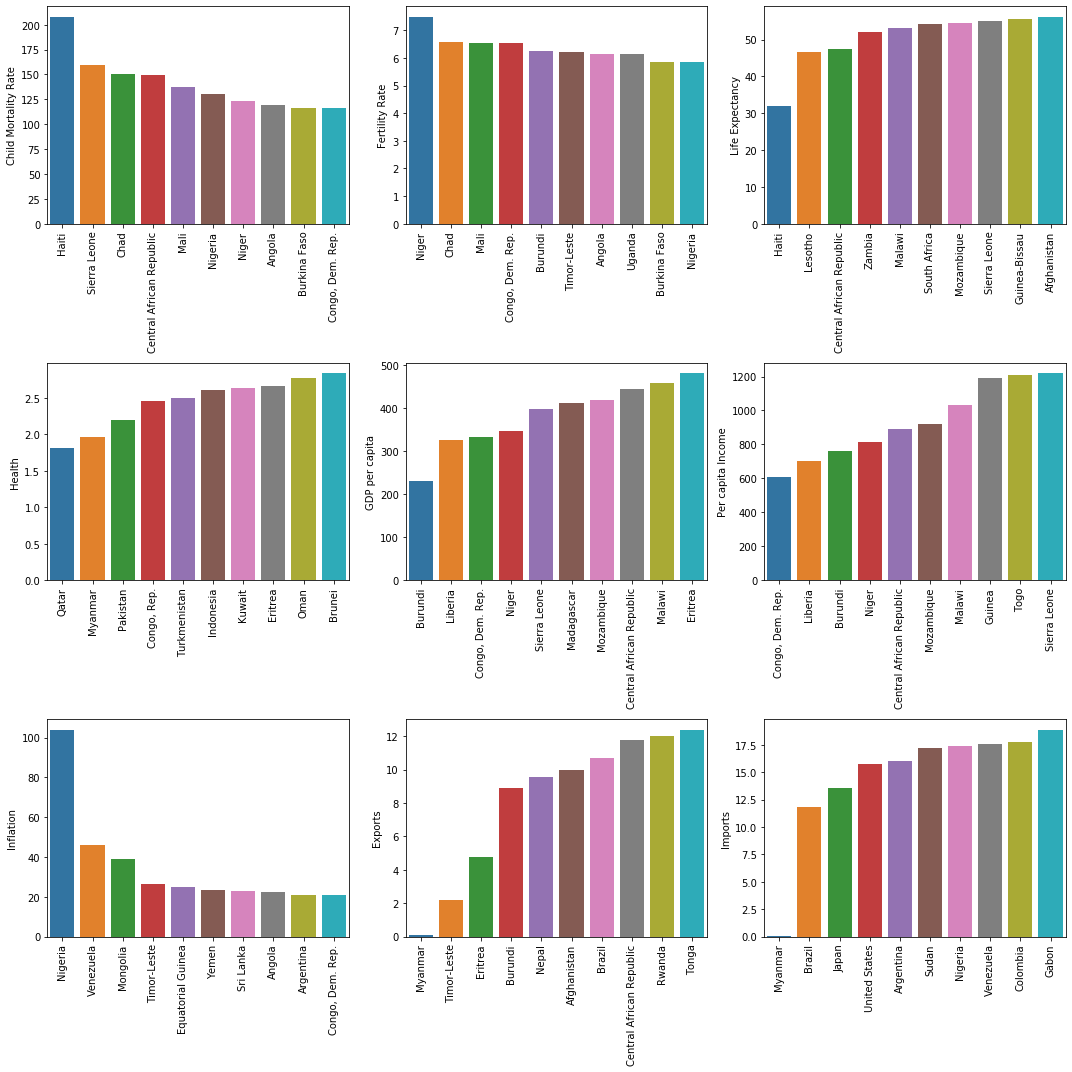

In [9]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Finding the top 10 countries with highest Child Mortality Rate

child_mortality = cntry_dat[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mortality, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')


# Finding the top 10 countries with highest The GDP per capita 
gdpp_data = cntry_dat[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= gdpp_data, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

#Finding the top 10 countries with highest Life Expectancy

life_expectancy = cntry_dat[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= life_expectancy, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Finding the top 10 countries with highest Health spending

health_spend = cntry_dat[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= health_spend, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')


# Finding the top 10 countries with highest Imports

imports_data = cntry_dat[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data=imports_data, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

# Finding the top 10 countries with highest Per capita Income

income_data = cntry_dat[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= income_data, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

# Finding the top 10 countries with highest Fertility Rate
fertility_rate = cntry_dat[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= fertility_rate, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')


# Finding the top 10 countries with highest Exports

exports_data = cntry_dat[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= exports_data, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

# Finding the top 10 countries with highest Inflation rate

inflation_rate = cntry_dat[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= inflation_rate, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()
    

####  Insights:
- From the above bar chart we can see that countries having high child mortality rate are the ones with low GDP and Income. 


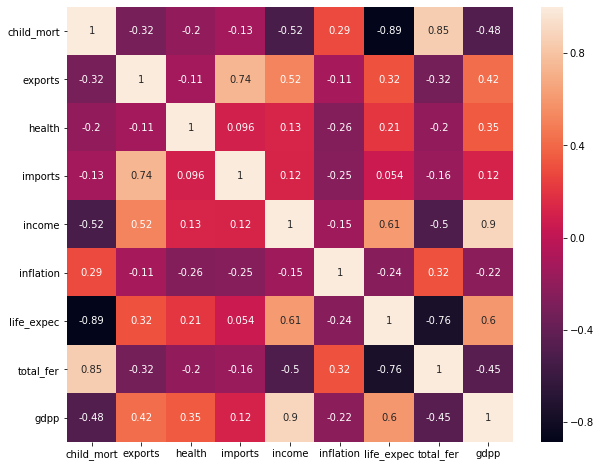

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize= (10,8))
sns.heatmap(cntry_dat.corr(), annot = True)
plt.show()

#### Insights:
- We can see that life expectency is highly negatively correlated with child mortality and total fertility rate which is obvious.
- Child mortality is also negatively corelated to income which is a interesting factor. It means People with low income are tend to loose their child more which shows that even if health care is available people are not able to utilize it properly.

### Outlier Analysis:

Lets check all columns if they have any outlier and treat them.

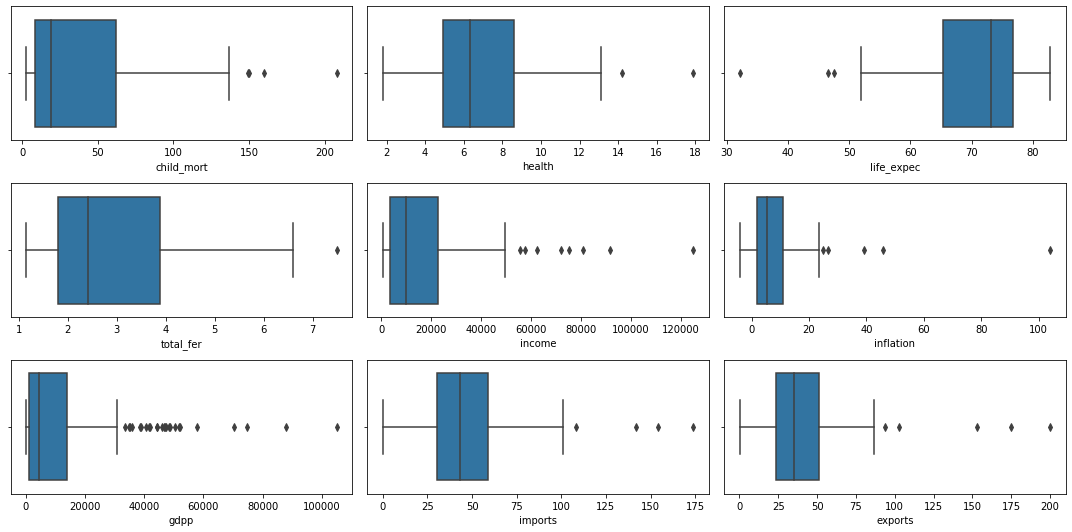

In [11]:
#Plotting boxplots to check outliers

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
fig1 = sns.boxplot(cntry_dat['child_mort'], ax = axs[0,0])
fig2 = sns.boxplot(cntry_dat['health'], ax = axs[0,1])
fig3 = sns.boxplot(cntry_dat['life_expec'], ax = axs[0,2])
fig4 = sns.boxplot(cntry_dat['total_fer'], ax = axs[1,0])
fig5 = sns.boxplot(cntry_dat['income'], ax = axs[1,1])
fig6 = sns.boxplot(cntry_dat['inflation'], ax = axs[1,2])
fig7 = sns.boxplot(cntry_dat['gdpp'], ax = axs[2,0])
fig8 = sns.boxplot(cntry_dat['imports'], ax = axs[2,1])
fig9 = sns.boxplot(cntry_dat['exports'], ax = axs[2,2])


plt.tight_layout()
plt.show()

We can observe that there are outliers present in every column. We need to identify backward countries based on socio economic and health factors, so we can not remove any country as it may lead to elimination of a deserving country.

In [12]:

# Lets cap the outliers to values accordingly for analysis.

cntry_dat1 = cntry_dat #Taking the copy of the data

prcntl = cntry_dat1['child_mort'].quantile([0.05,0.95]).values
cntry_dat1['child_mort'][cntry_dat1['child_mort'] <= prcntl[0]] = prcntl[0]
cntry_dat1['child_mort'][cntry_dat1['child_mort'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['health'].quantile([0.05,0.95]).values
cntry_dat1['health'][cntry_dat1['health'] <= prcntl[0]] = prcntl[0]
cntry_dat1['health'][cntry_dat1['health'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['life_expec'].quantile([0.05,0.95]).values
cntry_dat1['life_expec'][cntry_dat1['life_expec'] <= prcntl[0]] = prcntl[0]
cntry_dat1['life_expec'][cntry_dat1['life_expec'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['total_fer'].quantile([0.05,0.95]).values
cntry_dat1['total_fer'][cntry_dat1['total_fer'] <= prcntl[0]] = prcntl[0]
cntry_dat1['total_fer'][cntry_dat1['total_fer'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['income'].quantile([0.05,0.95]).values
cntry_dat1['income'][cntry_dat1['income'] <= prcntl[0]] = prcntl[0]
cntry_dat1['income'][cntry_dat1['income'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['inflation'].quantile([0.05,0.95]).values
cntry_dat1['inflation'][cntry_dat1['inflation'] <= prcntl[0]] = prcntl[0]
cntry_dat1['inflation'][cntry_dat1['inflation'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['gdpp'].quantile([0.05,0.95]).values
cntry_dat1['gdpp'][cntry_dat1['gdpp'] <= prcntl[0]] = prcntl[0]
cntry_dat1['gdpp'][cntry_dat1['gdpp'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['imports'].quantile([0.05,0.95]).values
cntry_dat1['imports'][cntry_dat1['imports'] <= prcntl[0]] = prcntl[0]
cntry_dat1['imports'][cntry_dat1['imports'] >= prcntl[1]] = prcntl[1]

prcntl = cntry_dat1['exports'].quantile([0.05,0.95]).values
cntry_dat1['exports'][cntry_dat1['exports'] <= prcntl[0]] = prcntl[0]
cntry_dat1['exports'][cntry_dat1['exports'] >= prcntl[1]] = prcntl[1]

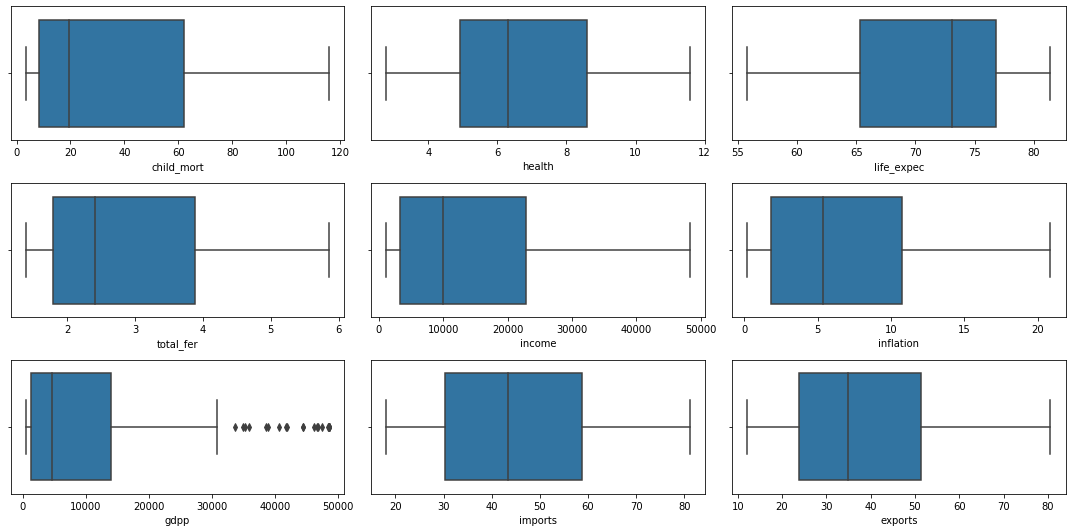

In [13]:
#Plotting after removing outliers

fig, axs = plt.subplots(3,3, figsize = (15,7.5))

fig1 = sns.boxplot(cntry_dat1['child_mort'], ax = axs[0,0])
fig2 = sns.boxplot(cntry_dat1['health'], ax = axs[0,1])
fig3 = sns.boxplot(cntry_dat1['life_expec'], ax = axs[0,2])
fig4 = sns.boxplot(cntry_dat1['total_fer'], ax = axs[1,0])
fig5 = sns.boxplot(cntry_dat1['income'], ax = axs[1,1])
fig6 = sns.boxplot(cntry_dat1['inflation'], ax = axs[1,2])
fig7 = sns.boxplot(cntry_dat1['gdpp'], ax = axs[2,0])
fig8 = sns.boxplot(cntry_dat1['imports'], ax = axs[2,1])
fig9 = sns.boxplot(cntry_dat1['exports'], ax = axs[2,2])

plt.tight_layout()

Now we have removed the outliers. Lets use the data to decide the principal components using PCA in the next step.

### Principal Component Analysis

In [14]:
#Lets drop the non numeric column from the dataset
cntry_dat2 = cntry_dat1.drop('country',axis=1)

In [15]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cntry_dat3 = scaler.fit_transform(cntry_dat2)
cntry_dat3

array([[ 1.47958789, -1.37144395,  0.32223234, ..., -1.82530988,
         2.02071786, -0.7578739 ],
       [-0.56002364, -0.57049292, -0.08621848, ...,  0.68245351,
        -0.88733091, -0.52377507],
       [-0.26350403, -0.04594061, -1.03001747, ...,  0.70740638,
        -0.02258739, -0.49928636],
       ...,
       [-0.37435248,  1.64876685,  0.02878224, ...,  0.2832076 ,
        -0.67811877, -0.70777132],
       [ 0.54014725, -0.46961748, -0.62949773, ..., -0.41547275,
         1.21873798, -0.70777132],
       [ 1.28283189, -0.11655342, -0.34794425, ..., -1.8777109 ,
         1.72782086, -0.69784347]])

In [16]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [17]:
#Performing the PCA
pca.fit(cntry_dat3)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
#List of PCA components.
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [19]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

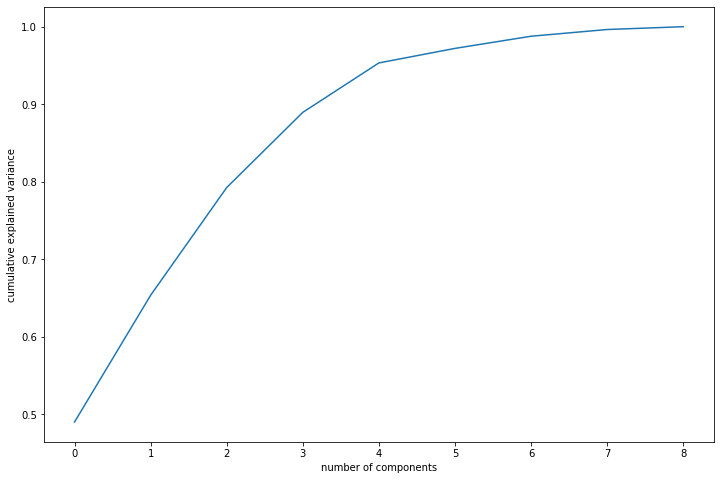

In [20]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see in the scree plot that around 95% variance is explained by 4 components. Lets do further analysis to confirm this

In [21]:
#Understanding how the original 4 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(cntry_dat2.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.421623,-0.032585,-0.094262,0.387864
1,exports,0.232156,-0.599838,0.295282,0.252625
2,health,0.181381,0.191686,-0.646498,0.283765
3,imports,0.094524,-0.729981,-0.283589,0.012585
4,income,0.410887,0.110986,0.198015,0.419843
5,inflation,-0.225176,0.079882,0.590478,0.169649
6,life_expec,0.431881,0.129883,0.113004,-0.225216
7,total_fer,-0.406693,-0.008781,-0.060062,0.446607
8,gdpp,0.393765,0.184042,0.035916,0.499832


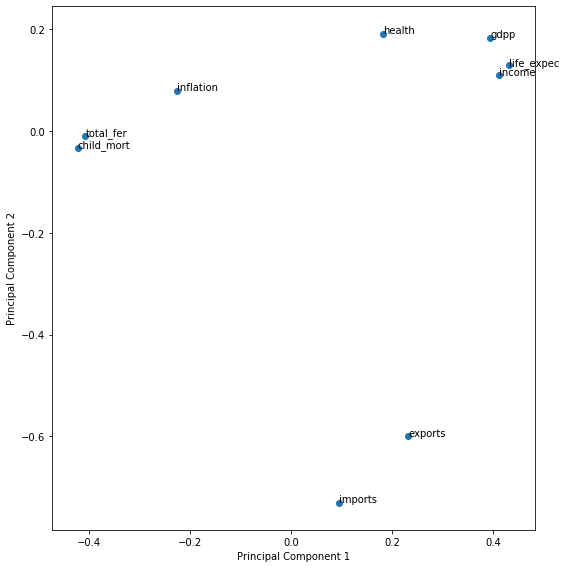

In [22]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()



We can see that the features are differently loaded. Some are close to PC1 while other features are close to PC2.

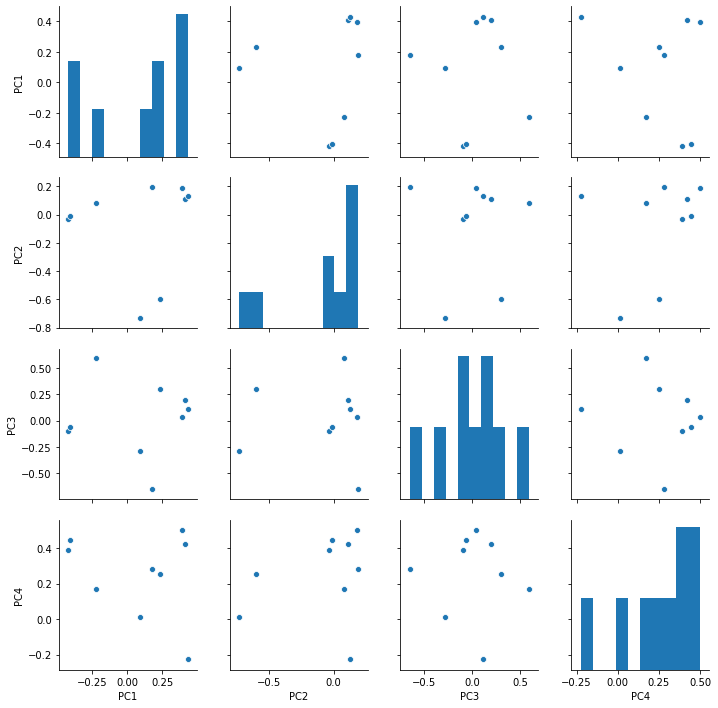

In [23]:
#Lets plot a pair plot to see the distribution of all the features
sns.pairplot(pcs_df)

In [24]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components for more efficiency.
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [25]:
#Basis transformation
df_pca = pca_final.fit_transform(cntry_dat3)
df_pca.shape

(167, 4)

In [26]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [27]:
#Creating a transpose so that the each column is properly arranged

pcs_df2 = pd.DataFrame({ 'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],
                       'PC4':pc[3]})


In [28]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [29]:
#Lets create correlation matrix of the principal components

corr = np.corrcoef(df_pca.transpose())

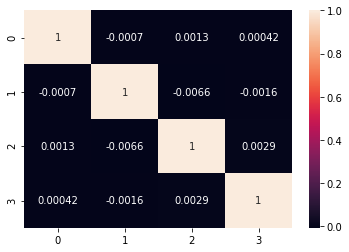

In [30]:
#Plotting the heatmap for PCA components

sns.heatmap(data=corr,annot=True)
plt.show()

As we can see in the above plot the correlatation between our principal components are almost equal to zero. It means there is little to no correlation between the components which is a good sign.

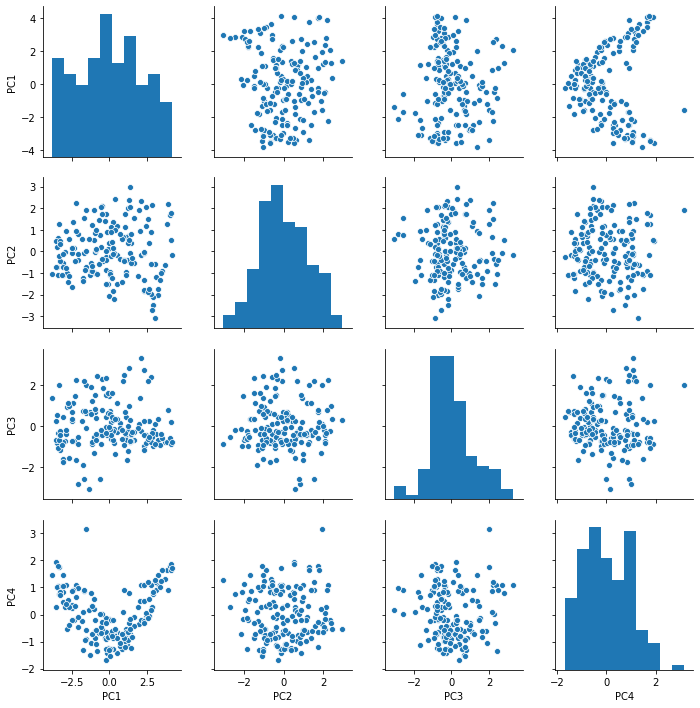

In [31]:
sns.pairplot(pcs_df2)

We can see in some plots clusters are forming. Lets go ahead and perform K-Means and Hierarchical clustering.

### K- means Clustering

In [32]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(pcs_df2)

0.6961727665036719

We got a Hopkins score of 78% which is a good cluster tendency. This means this data can be clustered very well. It has a high tendency of cluster.

In [34]:
cntry_dat4 = pcs_df2

In [35]:
#Lets do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cntry_dat4)
    sse_.append([k, silhouette_score(cntry_dat4, kmeans.labels_)])

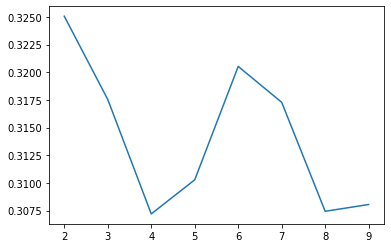

In [36]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm


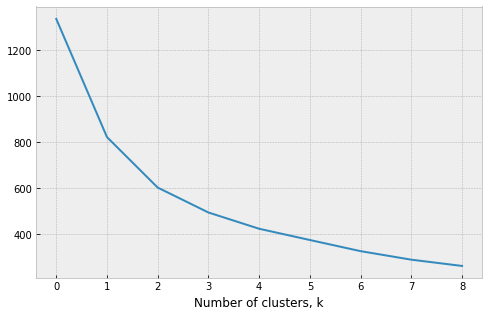

In [37]:
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cntry_dat4)
    ssd.append(model_clus.inertia_)

plt.figure(figsize=(8,5))

plt.style.use('bmh')
plt.xlabel('Number of clusters, k')


plt.plot(ssd)
plt.show()

The elbow curve also shows that there is a distinct bend after 3 clusters. Lets perform K-means using K=3

In [38]:
# K-Means using K=3

model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(cntry_dat4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [39]:
# Assigning Cluster IDs

cntry_dat5 = pcs_df2
cntry_dat5.index = pd.RangeIndex(len(cntry_dat5.index))
dat_km = pd.concat([cntry_dat5, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,1
1,0.483960,-0.161179,-0.284769,-1.425874,2
2,-0.447318,-0.424388,1.832563,-0.622794,2
3,-3.359135,1.259644,1.980609,1.750224,1
4,1.244074,0.697703,-0.269676,-0.771221,2


In [40]:
dat_km['ClusterID'].value_counts()

2    78
1    52
0    37
Name: ClusterID, dtype: int64

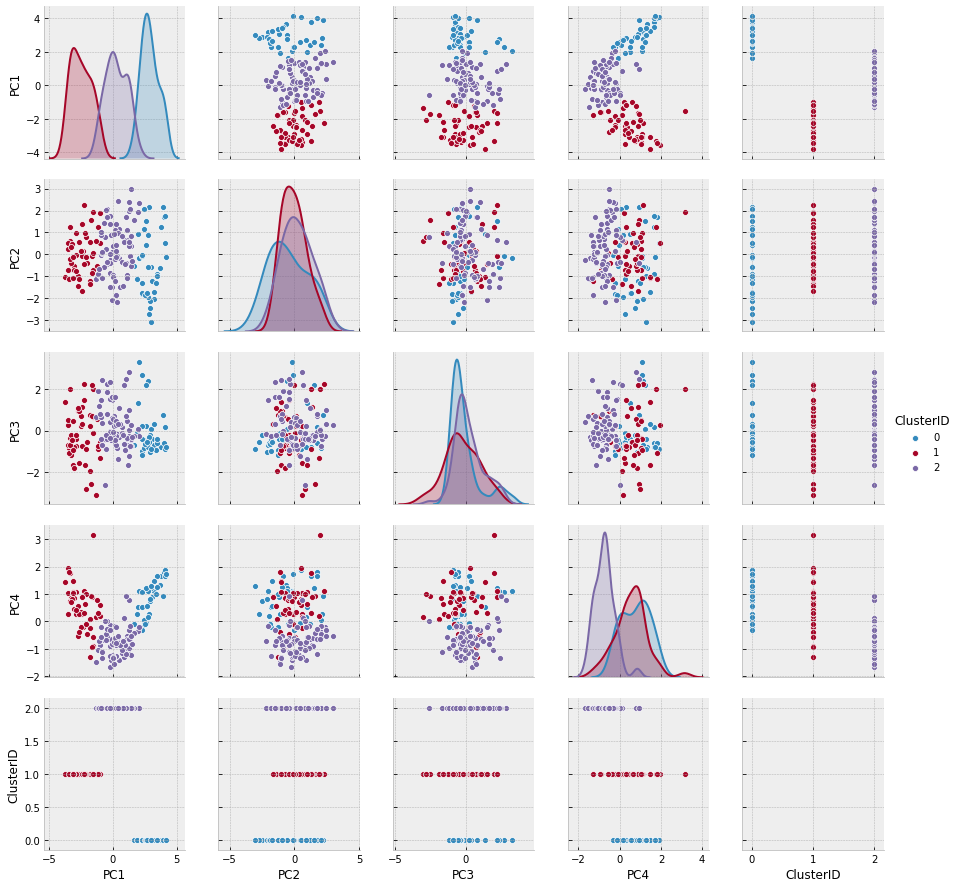

In [41]:
#Plotting the Clusters

sns.pairplot(data=dat_km,hue='ClusterID')

The above plot shows distinct clusters being formed. 

In [42]:
# K-Means using K=4


model_clus3 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus3.fit(cntry_dat4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [43]:
# Assigning Cluster IDs

cntry_dat55 = pcs_df2
cntry_dat55.index = pd.RangeIndex(len(cntry_dat55.index))
dat_km2 = pd.concat([cntry_dat55, pd.Series(model_clus3.labels_)], axis=1)
dat_km2.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_km2.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,3
1,0.483960,-0.161179,-0.284769,-1.425874,0
2,-0.447318,-0.424388,1.832563,-0.622794,2
3,-3.359135,1.259644,1.980609,1.750224,3
4,1.244074,0.697703,-0.269676,-0.771221,0


In [44]:
dat_km2['ClusterID'].value_counts()

0    51
3    47
2    35
1    34
Name: ClusterID, dtype: int64

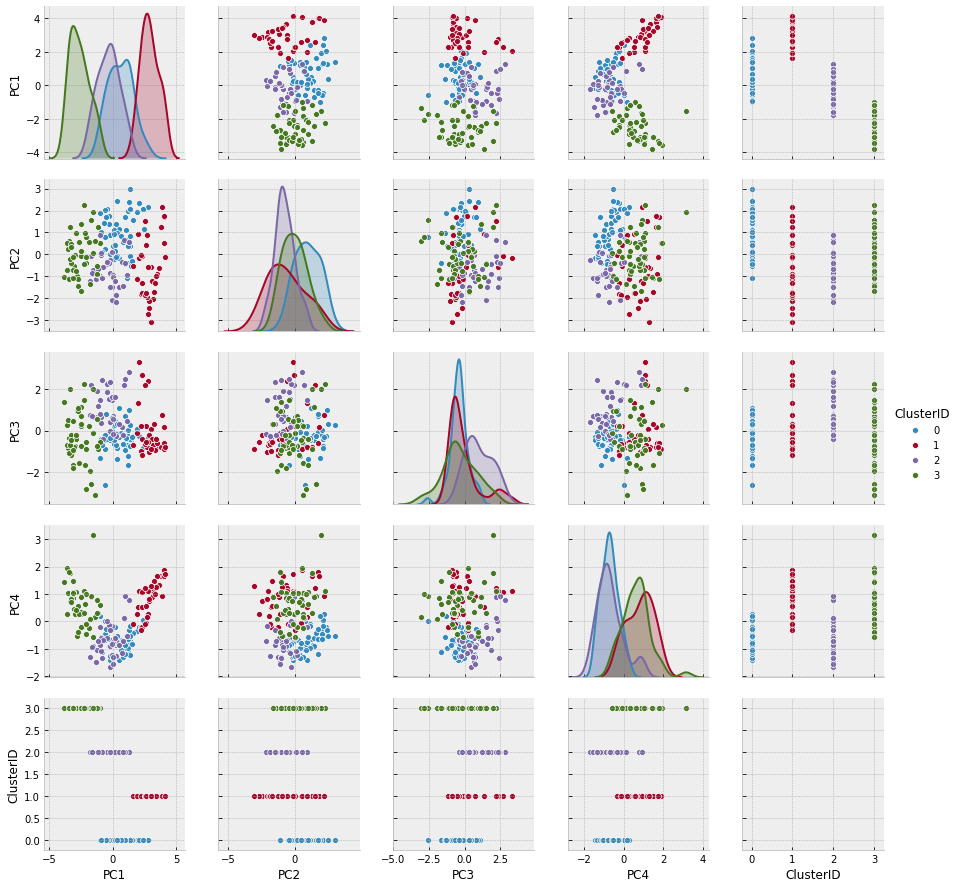

In [45]:
sns.pairplot(data=dat_km2,hue='ClusterID')

### Insight:

By analysing plots for K=3 ans K=4 we can see that K=3 is the better option here. Lets continue our analysis using K=3

In [46]:
#Merging the cluster data with the original data
cntry_dat6=pd.merge(cntry_dat1,dat_km, left_index=True,right_index=True)
cntry_dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,-3.275720,-0.427284,-1.055199,0.906249,1
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,0.483960,-0.161179,-0.284769,-1.425874,2
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,-0.447318,-0.424388,1.832563,-0.622794,2
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,-3.359135,1.259644,1.980609,1.750224,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1.244074,0.697703,-0.269676,-0.771221,2


### Analysing Clusters(K-Means)


In [47]:
cntry_dat7 = cntry_dat6[['country','child_mort','income','gdpp','ClusterID']]
cntry_dat7.head()

,country,child_mort,income,gdpp,ClusterID
0,Afghanistan,90.2,1610.0,553.0,1
1,Albania,16.6,9930.0,4090.0,2
2,Algeria,27.3,12900.0,4460.0,2
3,Angola,116.0,5900.0,3530.0,1
4,Antigua and Barbuda,10.3,19100.0,12200.0,2


In [48]:
#Count

cntry_dat7['ClusterID'].value_counts()

2    78
1    52
0    37
Name: ClusterID, dtype: int64

In [49]:
#Mean Analysis
clu_child_mort = pd.DataFrame(cntry_dat7.groupby(["ClusterID"]).child_mort.mean())
clu_income= pd.DataFrame(cntry_dat7.groupby(["ClusterID"]).income.mean())
clu_gdpp = pd.DataFrame(cntry_dat7.groupby(["ClusterID"]).gdpp.mean())


In [50]:
df = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_income,clu_gdpp],axis=1)

In [51]:
df.columns = ["ClusterID","clu_child_mort","clu_income","clu_gdpp"]
df

,ClusterID,clu_child_mort,clu_income,clu_gdpp
0,0,5.344324,38711.081081,37745.675676
1,1,84.075000,3886.480769,1848.598077
2,2,20.223077,12778.974359,6562.871795


# Insight:
- There is a relation between the clusters. Child mortality is inversely proportional to per capita income and per capita GDP of a country. So the aid should be distributed between the countries with more child mortality i.e. the countries with clusterID 1. 
- Since the developement of a country depends on increasing GDPP and income the NGO should look to help the countries with more child mortality

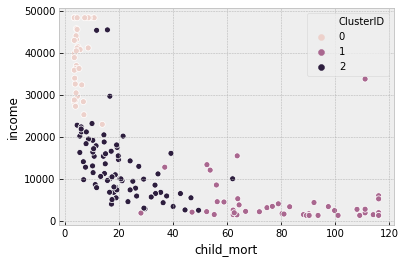

In [52]:
#Plotting the cluster data

sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=cntry_dat7)

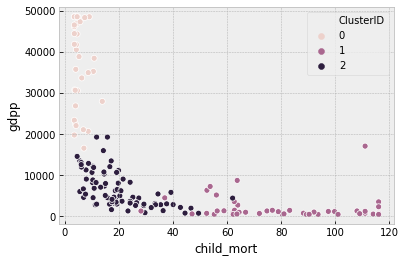

In [53]:

sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',data=cntry_dat7)

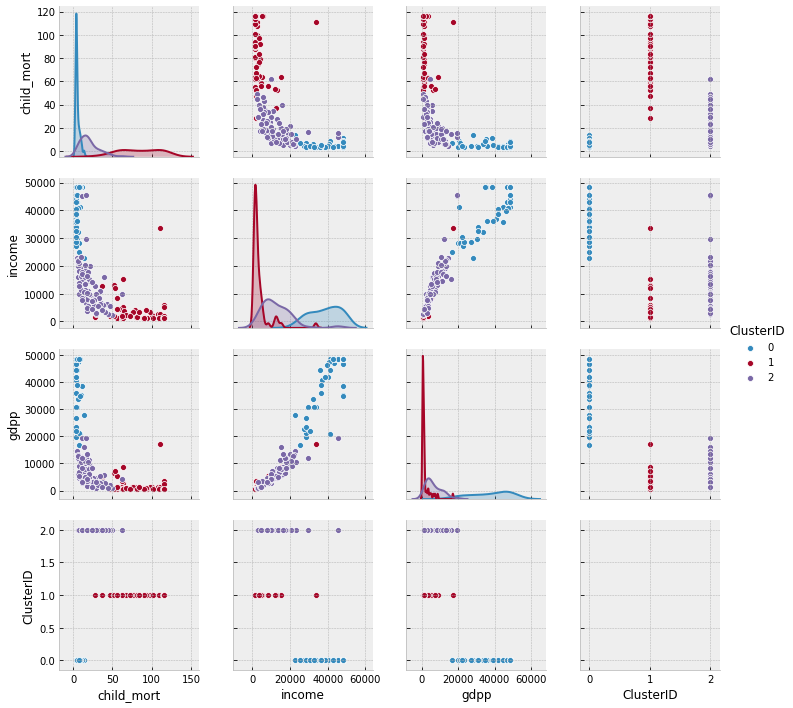

In [54]:
sns.pairplot(hue='ClusterID',data=cntry_dat7)
plt.show()

### Insight:
From the above plot we can see that 3 clusters are distinctly formed.

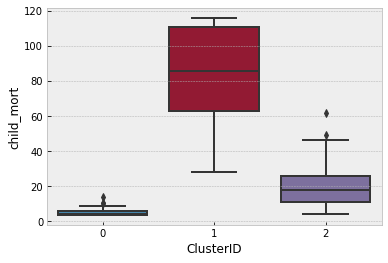

In [55]:
#Plotting boxplots to analyse the clusters
sns.boxplot(x='ClusterID',y='child_mort',data=cntry_dat7)
plt.show()

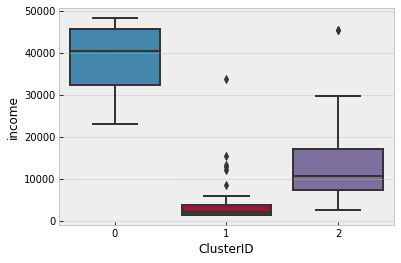

In [56]:
sns.boxplot(x='ClusterID',y='income',data=cntry_dat7)
plt.show()

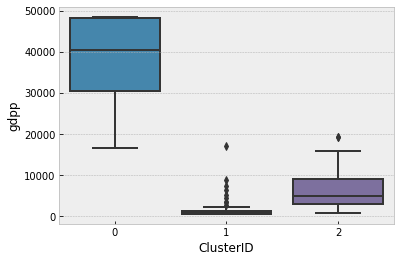

In [57]:
sns.boxplot(x='ClusterID',y='gdpp',data=cntry_dat7)
plt.show()

#### Insight:

- By comparing the boxplot swe can see that the gdpp and income is singnificantly low for cluster 1 and the child mortality is very high.
- It means that the NGO needs to focus on the countries where the child mortality is high i.e. countries assigned to cluster 1

### Hierarchical clustering
 

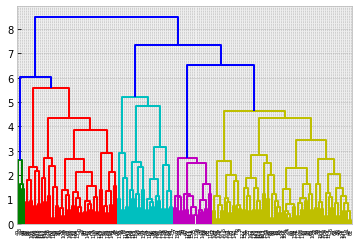

In [58]:
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

The hierarchical cluster shows distinct 5 clusters. Lets Cut the dendogram at n =5.

In [59]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [60]:
#Cutting the dendogram
cut_cluster = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
pcs_df2_hc = pd.concat([pcs_df2, cut_cluster], axis=1)
pcs_df2_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
pcs_df2_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [61]:
#Getting count of each cluster
pcs_df2_hc['ClusterID'].value_counts()

1    70
0    46
4    28
3    19
2     4
Name: ClusterID, dtype: int64

In [62]:
#Merging the cluster data with the original data
cntry_dat8=pd.merge(cntry_dat1,pcs_df2_hc, left_index=True,right_index=True)
cntry_dat8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1.244074,0.697703,-0.269676,-0.771221,1


### Analysing Clusters(Hierarchical)


In [63]:
cntry_dat9 = cntry_dat8[['country','child_mort','income','gdpp','ClusterID']]
cntry_dat9.head()

,country,child_mort,income,gdpp,ClusterID
0,Afghanistan,90.2,1610.0,553.0,0
1,Albania,16.6,9930.0,4090.0,1
2,Algeria,27.3,12900.0,4460.0,1
3,Angola,116.0,5900.0,3530.0,2
4,Antigua and Barbuda,10.3,19100.0,12200.0,1


In [64]:
#Count of each cluster
cntry_dat9['ClusterID'].value_counts()

1    70
0    46
4    28
3    19
2     4
Name: ClusterID, dtype: int64

In [65]:
#Mean Analysis

hc_child_mort = pd.DataFrame(cntry_dat9.groupby(["ClusterID"]).child_mort.mean())
hc_income= pd.DataFrame(cntry_dat9.groupby(["ClusterID"]).income.mean())
hc_gdpp = pd.DataFrame(cntry_dat9.groupby(["ClusterID"]).gdpp.mean())

In [66]:
df2 = pd.concat([pd.Series([0,1,2,3,4]),hc_child_mort,hc_income,hc_gdpp],axis=1)

In [67]:
df2.columns = ["ClusterID","hc_child_mort","hc_income","hc_gdpp"]
df2

,ClusterID,hc_child_mort,hc_income,hc_gdpp
0,0,83.769565,3200.152174,1554.067391
1,1,22.604286,10973.571429,5903.057143
2,2,97.075000,12027.500000,6142.500000
3,3,4.389474,38062.105263,40591.578947
4,4,8.558571,33732.857143,25861.071429


#### Insights:
- We see a similar pattern to K-means clusters here. The Income and GDPP of a country goes down with increase in Child mortality.
- Lets plot the data to find more on this.

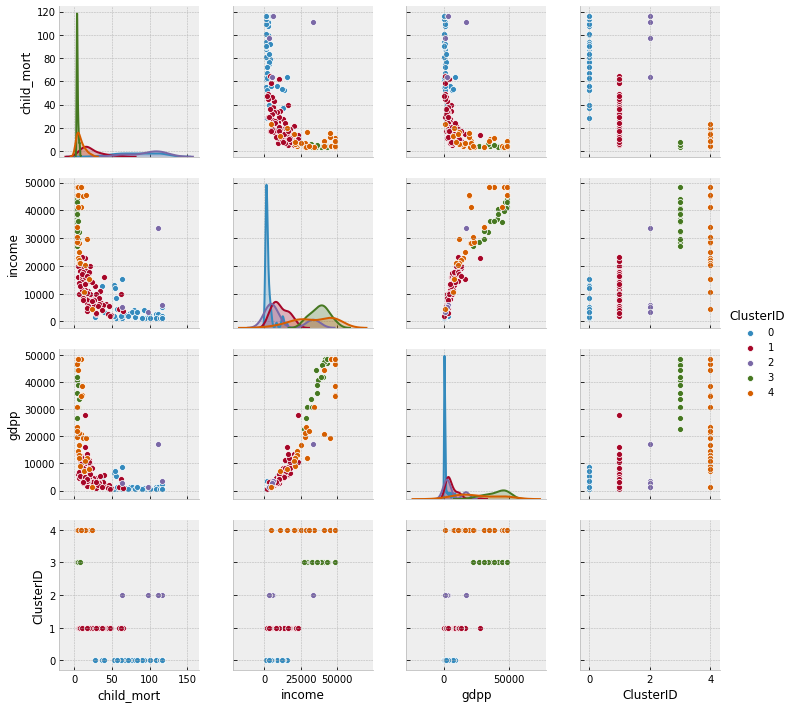

In [68]:
sns.pairplot(cntry_dat9,hue='ClusterID')
plt.show()

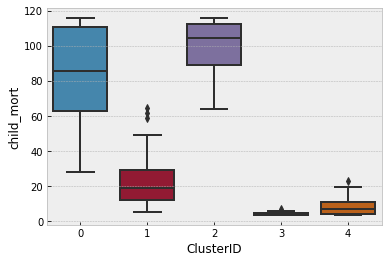

In [69]:
#Plotting boxplots to analyse the clusters
sns.boxplot(x='ClusterID',y='child_mort',data=cntry_dat9)
plt.show()


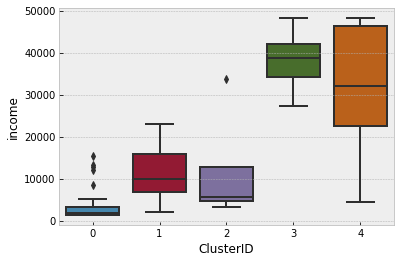

In [70]:
sns.boxplot(x='ClusterID',y='income',data=cntry_dat9)
plt.show()

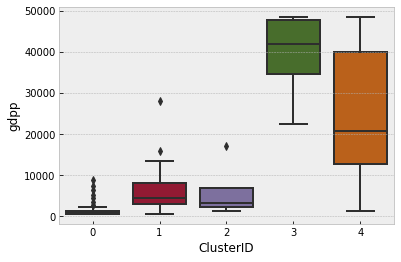

In [71]:
sns.boxplot(x='ClusterID',y='gdpp',data=cntry_dat9)
plt.show()

#### Insight:
- We see that for cluster 0 the childmortality is the highest and GDPP & Income are the lowest.
- Hence the NGO should focus on the countries with cluster id 0

- By comparing both K-means and Hierarchical clustering we find that Hierarchical clustering shows a better clustering group.
- Cluster 0 and cluster 2 both have high child mortality rate but gdpp and income is sgnificantly low in cluster 0 than cluster 1. Hence the NGO should focus more on the countris assigned with cluster 0.

In [72]:
#Lets find out the countries in cluster 0

cntry_dat9[cntry_dat9.ClusterID == 0].country.values

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

In [73]:
#Count of each cluster
cntry_dat9['ClusterID'].value_counts()

1    70
0    46
4    28
3    19
2     4
Name: ClusterID, dtype: int64

- There are 46 countries which should be focused by the NGO. Lets form a separate dataframe to analyse more.

In [74]:
#Country list

Country_list = cntry_dat9.loc[cntry_dat9['ClusterID']==0]

Country_list.head()


,country,child_mort,income,gdpp,ClusterID
0,Afghanistan,90.2,1610.0,553.0,0
17,Benin,111.0,1820.0,758.0,0
21,Botswana,52.5,13300.0,6350.0,0
25,Burkina Faso,116.0,1430.0,575.0,0
26,Burundi,93.6,1213.0,465.9,0


In [75]:
Country_list = Country_list[['country','child_mort','ClusterID']]
Country_list.head()

,country,child_mort,ClusterID
0,Afghanistan,90.2,0
17,Benin,111.0,0
21,Botswana,52.5,0
25,Burkina Faso,116.0,0
26,Burundi,93.6,0


- We now have a list of 46 countries which needs attention. The numbers seems very high. To priortise the funding lets divide the list of countries to two bins.
- We have the mean of the child mortality rate from the mean analysis. Lets use the same to bin the countries.
- The contries having mortality rate more than the mean of the overall cluster should be given priority by the NGO.

In [76]:
print(Country_list.child_mort.max())
print(Country_list.child_mort.mean())

116.0
83.7695652173913


In [77]:
#Binning the country list
Country_list['Priority'] = pd.cut(Country_list['child_mort'],[0,83,116],labels=['Priority2','Priority1'])
Country_list.head()



,country,child_mort,ClusterID,Priority
0,Afghanistan,90.2,0,Priority1
17,Benin,111.0,0,Priority1
21,Botswana,52.5,0,Priority2
25,Burkina Faso,116.0,0,Priority1
26,Burundi,93.6,0,Priority1


In [78]:
#Count of each bin
Country_list['Priority'].value_counts()

Priority1    24
Priority2    22
Name: Priority, dtype: int64

Now we have 24 countries with priority1. So we should list these 24 countries and recommend them to the NGO.

In [79]:
#List of countries by priority
print('Countries with Priority1 are:\n',Country_list[Country_list.Priority == 'Priority1'].country.values)
print('\nCountries with Priority2 are:\n',Country_list[Country_list.Priority == 'Priority2'].country.values)

Countries with Priority1 are:
 ['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Guinea' 'Guinea-Bissau' 'Haiti' 'Lesotho' 'Liberia'
 'Malawi' 'Mali' 'Mozambique' 'Niger' 'Nigeria' 'Pakistan' 'Sierra Leone'
 'Togo' 'Zambia']

Countries with Priority2 are:
 ['Botswana' 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Iraq' 'Kenya' 'Kiribati'
 'Lao' 'Madagascar' 'Micronesia, Fed. Sts.' 'Namibia' 'Rwanda' 'Senegal'
 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Uganda' 'Yemen']


Countries with Priority1 are:
 ['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Guinea' 'Guinea-Bissau' 'Haiti' 'Lesotho' 'Liberia'
 'Malawi' 'Mali' 'Mozambique' 'Niger' 'Nigeria' 'Pakistan' 'Sierra Leone'
 'Togo' 'Zambia'

Countries with Priority2 are:

 ['Botswana' 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Iraq' 'Kenya' 'Kiribati'
 'Lao' 'Madagascar' 'Micronesia, Fed. Sts.' 'Namibia' 'Rwanda' 'Senegal'
 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Uganda' 'Yemen']


In [80]:
#Final list

Country_list_final = Country_list.loc[Country_list['Priority']=='Priority1']
Country_list_final.shape

(24, 4)

In [81]:
#Lets group the contries in descending order So that we can present the data to the NGO with the 
#priority of each country.

Country_list_final = Country_list_final.sort_values('child_mort',ascending=[False])
Country_list_final.head()


,country,child_mort,ClusterID,Priority
66,Haiti,116.0,0,Priority1
32,Chad,116.0,0,Priority1
112,Niger,116.0,0,Priority1
97,Mali,116.0,0,Priority1
132,Sierra Leone,116.0,0,Priority1


In [82]:
Country_list_final.country.values

array(['Haiti', 'Chad', 'Niger', 'Mali', 'Sierra Leone',
       'Congo, Dem. Rep.', 'Nigeria', 'Central African Republic',
       'Burkina Faso', 'Guinea-Bissau', "Cote d'Ivoire", 'Benin',
       'Guinea', 'Cameroon', 'Mozambique', 'Lesotho', 'Burundi',
       'Pakistan', 'Malawi', 'Togo', 'Afghanistan', 'Liberia', 'Comoros',
       'Zambia'], dtype=object)

#### List Of countries to be recommended to the NGO for aid:

- 'Haiti'
- 'Chad'
- 'Niger'
- 'Mali'
- 'Sierra Leone',
- 'Congo, Dem. Rep.'
- 'Nigeria'
- 'Central African Republic',
- 'Burkina Faso'
- 'Guinea-Bissau'
- 'Cote d'Ivoire'
- 'Benin',
- 'Guinea'
- 'Cameroon'
- 'Mozambique'
- 'Lesotho'
- 'Burundi',
- 'Pakistan'
- 'Malawi'
- 'Togo'
- 'Afghanistan'
- 'Liberia'
- 'Comoros'
- 'Zambia'